In [211]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [336]:
%autoreload

from santautils import *

In [185]:
def plot_image(image):
    radius = (image.shape[0]-1)//2
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.matshow(image, extent=(-radius, radius+1, -radius, radius+1))
    ax.grid(None);
    

def plot_neighbors(config):
    point = (0, 0)
    cs = get_neighbors(config)
    k = 2 ** (len(config) - 1) + 1
    colors = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

    fig, ax = plt.subplots(figsize=(10, 11))
    for c in cs:
        X, Y = (np.vstack([[(0, 0)], np.asarray(c).cumsum(axis=0)])[:-1].T - 0.5)
        U, V = np.asarray(c).T
        ax.quiver(
            X, Y, U, V,
            angles='xy', scale_units='xy', scale=1,
            color=next(colors),
            width=0.0025,
            zorder=10,
            alpha=0.25,
        )
        point = get_position(c)
        ax.plot(point[0]-0.5, point[1]-0.5, '.', color='k', zorder=11)
    point = get_position(config)
    ax.plot(point[0]-0.5, point[1]-0.5, 'o', color='C3', zorder=11)
    ax.set_xlim(-k-1, k)
    ax.set_ylim(-k-1, k)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(-k, k+1))
    ax.set_yticks(np.arange(-k, k+1))
    ax.grid(True, color='0.5')
    ax.set_title(f"Neighbors of {config}", fontsize=20);

    
def plot_path(path):
    config = path[0]
    point = get_position(config)
    k = 2 ** (len(config) - 1) + 1
    colors = plt.cm.plasma(np.linspace(0, 1, len(path)))

    fig, ax = plt.subplots(figsize=(10, 11))
    for i, c in enumerate(path):
        prev_point = point
        point = get_position(c)
        ax.plot(point[0]-0.5, point[1]-0.5, '.', color="k", zorder=11)
        ax.arrow(prev_point[0]-0.49, prev_point[1]-0.49, point[0]-prev_point[0], point[1]-prev_point[1],
                 width=0.0025, zorder=10, alpha=0.8, head_width=0.1, length_includes_head=True, color=colors[i])
    point = get_position(config)
    ax.plot(point[0]-0.5, point[1]-0.5, 'o', color='C3', zorder=11)
    ax.set_xlim(-k-1, k)
    ax.set_ylim(-k-1, k)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(-k, k+1))
    ax.set_yticks(np.arange(-k, k+1))
    ax.grid(True, color='0.5')
    ax.set_title(f"Plot of path", fontsize=20);

KeyboardInterrupt: 

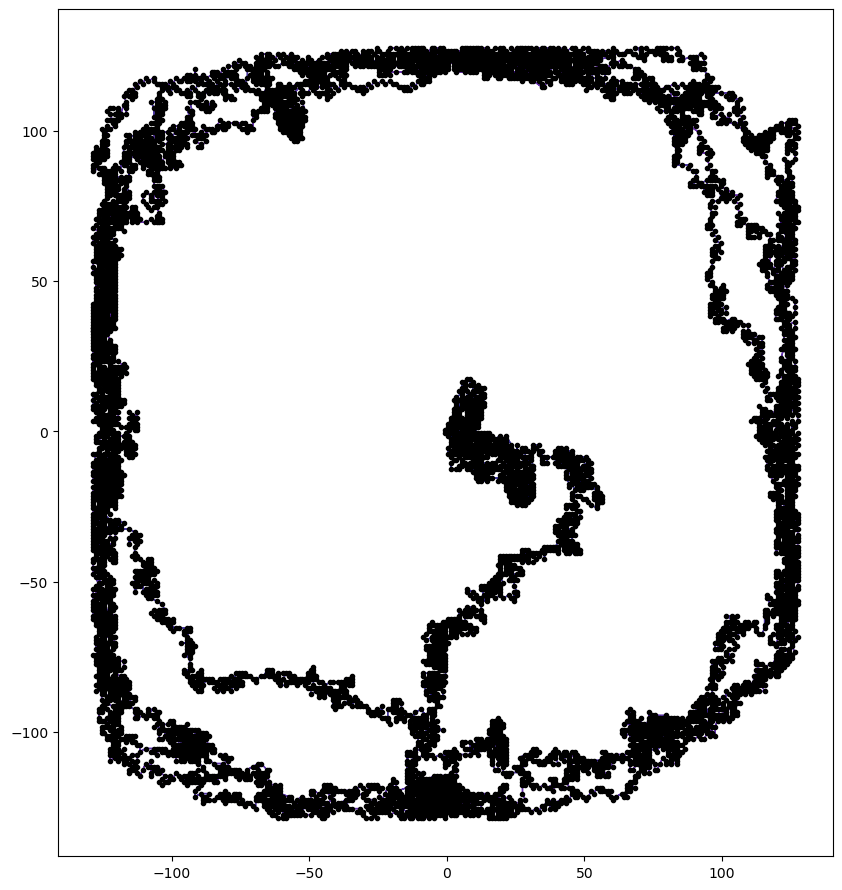

In [335]:
import json

with open("output/web_renders/test_path.json", "r") as file:
    path = json.loads(file.read())

plot_path(path)

In [215]:
sorted(get_neighbors_positions_costs(path[16], image=image), key=lambda x: x[-1])

[([(-4, 0), (-2, 0), (-1, 0), (-1, 0)], (-8, 0), 0.0),
 ([(-4, 0), (-2, 0), (-1, 0), (-1, -1)], (-8, -1), 1.0),
 ([(-4, 0), (-2, 0), (-1, -1), (-1, 0)], (-8, -1), 1.0),
 ([(-4, 0), (-2, -1), (-1, 0), (-1, 0)], (-8, -1), 1.0),
 ([(-4, -1), (-2, 0), (-1, 0), (-1, 0)], (-8, -1), 1.0),
 ([(-4, 1), (-2, 0), (-1, 0), (-1, -1)], (-8, 0), 1.4142135623730951),
 ([(-4, 1), (-2, 0), (-1, -1), (-1, 0)], (-8, 0), 1.4142135623730951),
 ([(-4, 1), (-2, -1), (-1, 0), (-1, 0)], (-8, 0), 1.4142135623730951),
 ([(-4, 0), (-2, 1), (-1, 0), (-1, -1)], (-8, 0), 1.4142135623730951),
 ([(-4, 0), (-2, 1), (-1, -1), (-1, 0)], (-8, 0), 1.4142135623730951),
 ([(-4, 0), (-2, 0), (-1, 1), (-1, -1)], (-8, 0), 1.4142135623730951),
 ([(-4, 0), (-2, 0), (-1, -1), (-1, 1)], (-8, 0), 1.4142135623730951),
 ([(-4, 0), (-2, 0), (-1, -1), (-1, -1)], (-8, -2), 1.4142135623730951),
 ([(-4, 0), (-2, -1), (-1, 1), (-1, 0)], (-8, 0), 1.4142135623730951),
 ([(-4, 0), (-2, -1), (-1, 0), (-1, 1)], (-8, 0), 1.4142135623730951),
 ([(-

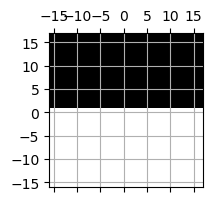

In [208]:
left_half = np.zeros(shape=(16, 33, 3))
right_half = np.ones(shape=(17, 33, 3))

image = np.concatenate([left_half, right_half], axis=0)
plot_image(image)

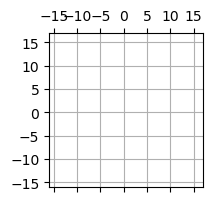

In [44]:
image = np.ones(shape=(33, 33, 3))
plot_image(image)

In [67]:
test_df = image_to_df(image)
test_df

,x,y,r,g,b
0,-16,16,0.0,0.0,0.0
1,-15,16,0.0,0.0,0.0
2,-14,16,0.0,0.0,0.0
3,-13,16,0.0,0.0,0.0
4,-12,16,0.0,0.0,0.0
...,...,...,...,...,...
1084,12,-16,1.0,1.0,1.0
1085,13,-16,1.0,1.0,1.0
1086,14,-16,1.0,1.0,1.0
1087,15,-16,1.0,1.0,1.0


In [66]:
config = [(4, 0), (-2, 0), (-1, 0), (-1, 0)]

In [68]:
get_position(config)

(0, 0)

In [53]:
neigh_recon_cost = list(starmap(reconfiguration_cost, zip(repeat(config), get_neighbors(config))))
neigh_recon_cost

[2.0,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 1.4142135623730951,
 1.7320508075688772,
 1.4142135623730951,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 1.4142135623730951,
 1.7320508075688772,
 1.4142135623730951,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 1.4142135623730951,
 1.7320508075688772,
 1.4142135623730951,
 1.0,
 1.4142135623730951,
 1.0,
 1.0,
 1.4142135623730951,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 1.4142135623730951,
 1.7320508075688772,
 1.4142135623730951,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 1.7320508

In [45]:
color_cost_partial = partial(color_cost, image=image)

In [ ]:
config1 = [(4, 0), (-2, 0), (-1, 0), (-1, 0)]
config2 = 

In [ ]:
step_cost()

In [70]:
step_cost_partial = partial(step_cost, image=image)

neigh_step_cost = list(starmap(step_cost_partial, zip(repeat(config), get_neighbors(config))))
neigh_step_cost

[11.0,
 10.732050807568877,
 2.0,
 10.732050807568877,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 2.0,
 10.732050807568877,
 1.4142135623730951,
 1.7320508075688772,
 1.4142135623730951,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 1.7320508075688772,
 2.0,
 10.732050807568877,
 10.414213562373096,
 10.732050807568877,
 10.414213562373096,
 10.0,
 1.4142135623730951,
 10.732050807568877,
 1.4142135623730951,
 1.7320508075688772,
 10.414213562373096,
 10.0,
 1.4142135623730951,
 10.0,
 1.0,
 1.4142135623730951,
 1.0,
 1.4142135623730951,
 10.732050807568877,
 1.4142135623730951,
 1.7320508075688772,
 1.4142135623730951,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 1.4142135623730951,
 1.7320508075688772,
 11.0,
 10.732050807568877,
 11.0,
 10.732050807568877,
 10.414213562373096,
 10.732050807568877,
 11.0,
 10

In [29]:
reconfiguration_cost(*list(zip(repeat(config), get_neighbors(config)))[:2][0])

2.0

In [72]:
list(zip(repeat(config), get_neighbors(config), starmap(step_cost_partial, zip(repeat(config), get_neighbors(config)))))[0]

([(4, 0), (-2, 0), (-1, 0), (-1, 0)],
 [(4, -1), (-2, 1), (-1, 1), (-1, 1)],
 11.0)

In [97]:
def get_neighbors_positions_costs(config):
    return list(zip(get_neighbors(config), 
                    map(get_position, get_neighbors(config)), 
                    starmap(step_cost_partial, zip(repeat(config), get_neighbors(config)))
                   ))

[([(4, -1), (-2, 1), (-1, 1), (-1, 1)], (0, 2), 11.0),
 ([(4, -1), (-2, 1), (-1, 1), (-1, 0)], (0, 1), 10.732050807568877),
 ([(4, -1), (-2, 1), (-1, 1), (-1, -1)], (0, 0), 2.0),
 ([(4, -1), (-2, 1), (-1, 0), (-1, 1)], (0, 1), 10.732050807568877),
 ([(4, -1), (-2, 1), (-1, 0), (-1, 0)], (0, 0), 1.4142135623730951)]

In [118]:
config = [(4, 0), (-2, 0), (-1, 0), (-1, 0)]
visited = {(0, 2)}
unvisited = list(filter(lambda c: get_position(c) in visited, get_neighbors(config)))

[[(4, -1), (-2, 1), (-1, 1), (-1, 1)],
 [(4, 0), (-2, 1), (-1, 1), (-1, 0)],
 [(4, 0), (-2, 1), (-1, 0), (-1, 1)],
 [(4, 0), (-2, 0), (-1, 1), (-1, 1)],
 [(4, 1), (-2, 1), (-1, 1), (-1, -1)],
 [(4, 1), (-2, 1), (-1, 0), (-1, 0)],
 [(4, 1), (-2, 1), (-1, -1), (-1, 1)],
 [(4, 1), (-2, 0), (-1, 1), (-1, 0)],
 [(4, 1), (-2, 0), (-1, 0), (-1, 1)],
 [(4, 1), (-2, -1), (-1, 1), (-1, 1)]]

In [130]:
def get_unvisited_neighbors(config, unvisited):
    return list(filter(lambda c: get_position(c) in unvisited, get_neighbors(config)))

def get_cheapest_unvisited_neighbor(config, unvisited, cost):
    candidates = get_unvisited_neighbors(config, unvisited)
    return min(zip(candidates,
                   starmap(cost, zip(repeat(config), candidates))
                  ), key=lambda x: x[-1])[0]

In [132]:
min(zip(get_neighbors(config),
        map(get_position, get_neighbors(config)),
        starmap(step_cost_partial, zip(repeat(config), get_neighbors(config)))
       ), key=lambda x: x[-1])[0]

[(4, -1), (-2, 0), (-1, 0), (-1, 0)]

In [135]:
config = [(4, 0), (-2, 0), (-1, 0), (-1, 0)]
origin = [(4, 0), (-2, 0), (-1, 0), (-1, 0)]
n = origin[0][0]**2
points = list(product(range(-n, n+1), repeat=2))
unvisited = set(points)
get_cheapest_unvisited_neighbor(config, unvisited, cost=step_cost_partial)

[(4, -1), (-2, 0), (-1, 0), (-1, 0)]

In [136]:
def test():
    left_half = np.zeros(shape=(16, 33, 3))
    right_half = np.ones(shape=(17, 33, 3))
    image = np.concatenate([left_half, right_half], axis=0)
    
    origin = [(4, 0), (-2, 0), (-1, 0), (-1, 0)]
    n = origin[0][0]**2
    points = list(product(range(-n, n+1), repeat=2))
    unvisited = set(points)
    
    step_cost_partial = partial(step_cost, image=image)
    
    path = [origin]
    unvisited.remove(get_position(origin))
    while unvisited:
        config = path[-1]
        print(config)
        next_config = get_cheapest_unvisited_neighbor(config, unvisited, step_cost_partial)
        next_position = get_position(next_config)
        unvisited.remove(next_position)
        path.append(next_config)
    
    path.extend(get_path_to_configuration(path[-1], origin)[1:])
    
    print(len(path))
    
test()

[(4, 0), (-2, 0), (-1, 0), (-1, 0)]
[(4, -1), (-2, 0), (-1, 0), (-1, 0)]
[(4, -2), (-2, 0), (-1, 0), (-1, 0)]
[(4, -3), (-2, 0), (-1, 0), (-1, 0)]
[(4, -4), (-2, 0), (-1, 0), (-1, 0)]
[(3, -4), (-2, 0), (-1, 0), (-1, 0)]
[(2, -4), (-2, 0), (-1, 0), (-1, 0)]
[(1, -4), (-2, 0), (-1, 0), (-1, 0)]
[(0, -4), (-2, 0), (-1, 0), (-1, 0)]
[(-1, -4), (-2, 0), (-1, 0), (-1, 0)]
[(-2, -4), (-2, 0), (-1, 0), (-1, 0)]
[(-3, -4), (-2, 0), (-1, 0), (-1, 0)]
[(-4, -4), (-2, 0), (-1, 0), (-1, 0)]
[(-4, -3), (-2, 0), (-1, 0), (-1, 0)]
[(-4, -2), (-2, 0), (-1, 0), (-1, 0)]
[(-4, -1), (-2, 0), (-1, 0), (-1, 0)]
[(-4, 0), (-2, 0), (-1, 0), (-1, 0)]
[(-4, 1), (-2, 0), (-1, 0), (-1, 0)]
[(-4, 2), (-2, 0), (-1, 0), (-1, 0)]
[(-4, 3), (-2, 0), (-1, 0), (-1, 0)]
[(-4, 4), (-2, 0), (-1, 0), (-1, 0)]
[(-3, 4), (-2, 0), (-1, 0), (-1, 0)]
[(-2, 4), (-2, 0), (-1, 0), (-1, 0)]
[(-1, 4), (-2, 0), (-1, 0), (-1, 0)]
[(0, 4), (-2, 0), (-1, 0), (-1, 0)]
[(1, 4), (-2, 0), (-1, 0), (-1, 0)]
[(2, 4), (-2, 0), (-1, 0), (-1, 0)

ValueError: min() arg is an empty sequence

(8, 1)

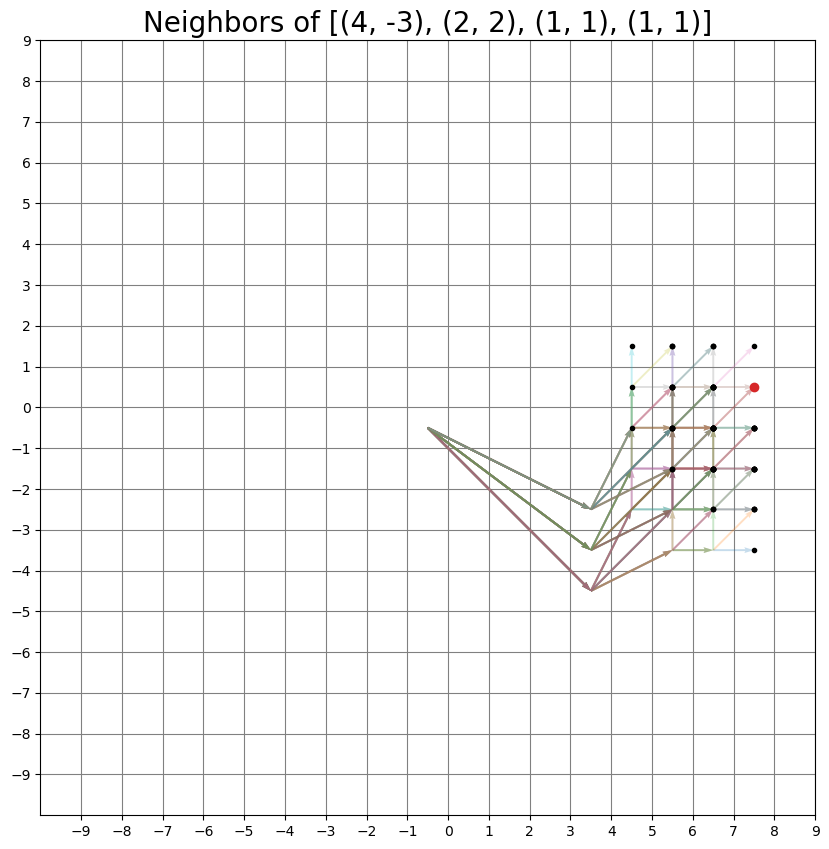

In [257]:
config = [(4, -3), (2, 2), (1, 1), (1, 1)]
plot_neighbors(config)
get_position(config)

In [261]:
config = [(4, -3), (2, 2), (1, 1), (1, 1)]
%timeit get_neighbors_positions_costs(config, image)

2.15 ms ± 274 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


([(1, -4), (2, 1), (1, 0), (-1, 1)], (3, -2), 3.682352941176471)

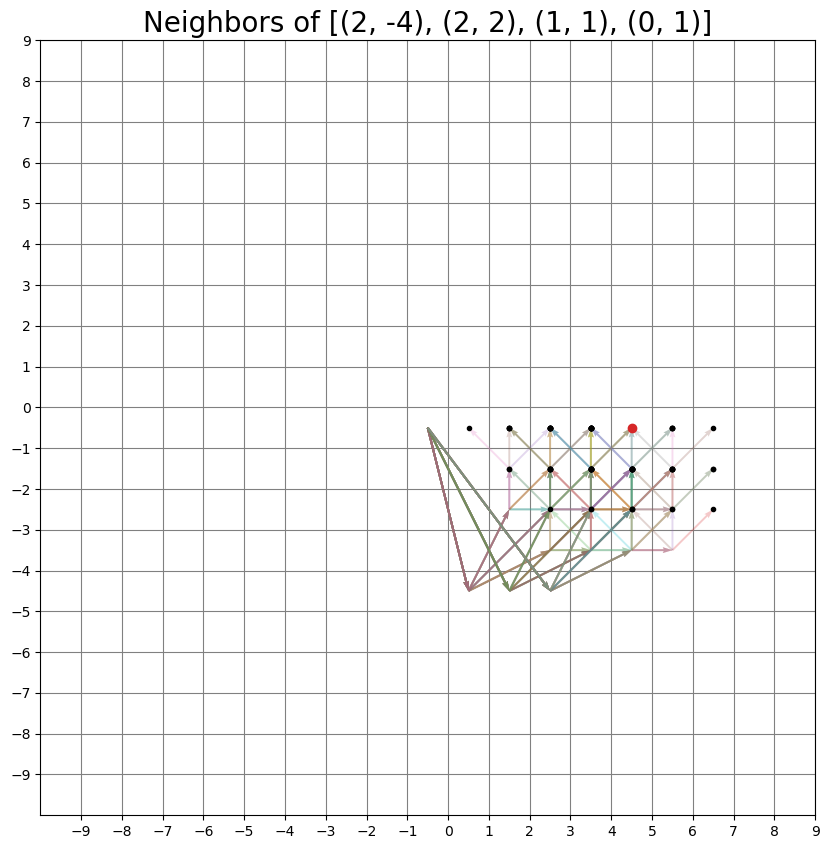

In [247]:
config = [(2, -4), (2, 2), (1, 1), (0, 1)]
plot_neighbors(config)
get_cheapest_farthest_neighbor(config, image)

In [290]:
3**8

6561

In [291]:
step_cost

<function santautils.step_cost(from_config, to_config, image)>

In [295]:
image = df_to_image(pd.read_csv("data/image.csv"))
config = [(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0), (-2, 0), (-1, 0), (-1, 0)]
n = config[0][0] * 2
points = list(product(range(-n, n + 1), repeat=2))
unvisited = set(points)

%timeit get_cheapest_unvisited_neighbor(config, unvisited, partial(step_cost, image=image))

112 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [273]:
config = [(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0), (-2, 0), (-1, 0), (-1, 0)]
def all_possible_configs(config):
    total = 1
    for arm in config:
        l = max(map(abs, arm))
        total *= 8*l
    return total

In [276]:
config = [(-1, 0), (-1, 0)]
all_possible_configs(config)

64

In [278]:
config = [(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0), (-2, 0), (-1, 0), (-1, 0)]
all_configs = all_possible_configs(config)

In [288]:
config = [(-32, 0), (-16, 0), (-8, 0), (-4, 0), (-2, 0), (-1, 0), (-1, 0)]
seven_arms = all_possible_configs(config)

In [289]:
seven_arms*3/10**9

206.158430208

In [280]:
print(f"{all_configs:E}")

3.518437E+13


In [285]:
35*10**12/10**9/8

4375.0

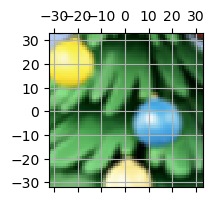

In [241]:
def sliced_image(config, image):
    n = config[0][0] * 2

    top_left = cartesian_to_array(*(-n, n), image.shape)
    bottom_right = cartesian_to_array(*(n, -n), image.shape)

    sliced_image = image[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1, :]
    return sliced_image

config = [(16, 0), (8, 0), (4, 0), (-2, 0), (-1, 0), (-1, 0)]
plot_image(sliced_image(config, image))

In [237]:
sliced_image.shape

(65, 65, 3)

In [307]:
def get_unvisited_neighbors(config, unvisited):
    return filter(lambda c: get_position(c) in unvisited, get_neighbors(config))


def get_cheapest_unvisited_neighbor(config, unvisited, cost):
    candidates = get_unvisited_neighbors(config, unvisited)
    return min(zip(candidates,
                   starmap(cost, zip(repeat(config), candidates))
                  ), key=lambda x: x[-1])

In [333]:
config = [(16, 0), (-8, 0), (-4, 0), (-2, 0), (-1, 0), (-1, 0)]
%timeit get_cheapest_unvisited_neighbor(config, unvisited, partial(step_cost, image=image))

10 ms ± 451 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [331]:
get_cheapest_unvisited_neighbor(config, unvisited, partial(step_cost, image=image))

[(16, -1), (-8, 0), (-4, 0), (-2, 0), (-1, 0), (-1, 1)]

In [312]:
%load_ext snakeviz

In [334]:
config = [(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0), (-2, 0), (-1, 0), (-1, 0)]
%snakeviz get_cheapest_unvisited_neighbor(config, unvisited, partial(step_cost, image=image))

 
*** Profile stats marshalled to file '/tmp/tmpiqfhh6y7'.
Embedding SnakeViz in this document...


In [322]:
from_conf = [(1, 0), (0, 1)]
to_conf = [(1, 1), (1, 1)]

pairs = list(zip(from_conf, to_conf))

In [323]:
pairs[0]

((1, 0), (1, 1))

In [327]:
list(abs(x0-x1) + abs(y0-y1) for (x0, y0), (x1, y1) in zip(from_conf, to_conf))

[1, 1]

In [330]:
from math import sqrt

from_conf = [(16, 0), (-8, 0), (-4, 0), (-2, 0), (-1, 0), (-1, 0)]
to_conf = [(16, -1), (-8, 0), (-4, 0), (-2, 0), (-1, 0), (-1, 1)]

sqrt(sum(abs(x0-x1) + abs(y0-y1) for (x0, y0), (x1, y1) in zip(from_conf, to_conf)))

1.4142135623730951